### Importación de datos



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()


print(f"Ingreso total de la tienda 1: ${round(ingreso_tienda1):,.0f}")
print(f"Ingreso total de la tienda 2: ${round(ingreso_tienda2):,.0f}")
print(f"Ingreso total de la tienda 3: ${round(ingreso_tienda3):,.0f}")
print(f"Ingreso total de la tienda 4: ${round(ingreso_tienda4):,.0f}")


Ingreso total de la tienda 1: $1,150,880,400
Ingreso total de la tienda 2: $1,116,343,500
Ingreso total de la tienda 3: $1,098,019,600
Ingreso total de la tienda 4: $1,038,375,700


A traves del analisis, se entiende que la tienda 1 es la que mas ingresos genera, mientras que la tienda 4, es la que menos ingresos recauda.

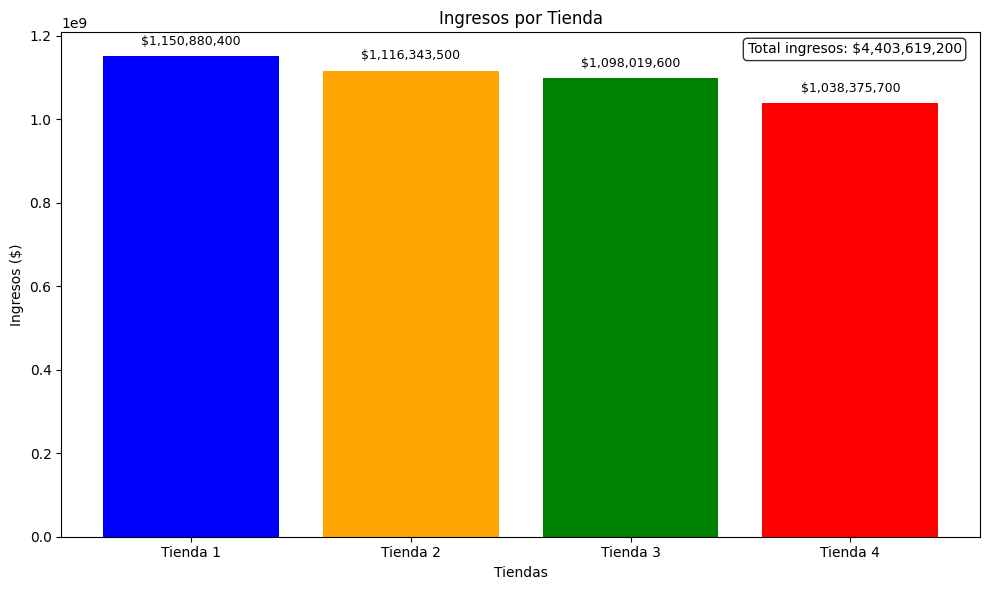

In [32]:
# generame un grafico de barras con los ingresos de cada tienda

plt.figure(figsize=(10,6))
bars = plt.bar(tiendas, ingresos, color=['blue', 'orange', 'green', 'red'])
plt.title('Ingresos por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')

# Anotar cada barra con su valor
for bar, val in zip(bars, ingresos):
    plt.annotate(f'${int(val):,}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 6), textcoords='offset points', ha='center', va='bottom', fontsize=9)

# Mostrar el total de ingresos en la esquina superior derecha del gráfico
total = sum(ingresos)
plt.gca().text(0.98, 0.98, f'Total ingresos: ${int(total):,}', transform=plt.gca().transAxes,
               ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [36]:
# Mostrar solo la categoría más popular (con su cantidad) de cada tienda
ventas = [ventas_por_categoria_tienda1, ventas_por_categoria_tienda2, ventas_por_categoria_tienda3, ventas_por_categoria_tienda4]

for nombre, serie in zip(tiendas, ventas):
    top_categoria = serie.idxmax()
    top_count = int(serie.max())
    print(f"{nombre}: {top_categoria} ({top_count} ventas)")


Tienda 1: Muebles (465 ventas)
Tienda 2: Muebles (442 ventas)
Tienda 3: Muebles (499 ventas)
Tienda 4: Muebles (480 ventas)


gracias a este analisis, se entiende dos cosas, 1.- la categoria que mas recauda ventas es la categoria de muebles, a demas de que la tienda numero 3 es la que lidera en ventas con un total de 499 ventas, mientras que la tienda con menores ventas en esta categoria es la tienda 2 con 442 ventas totales de muebles.

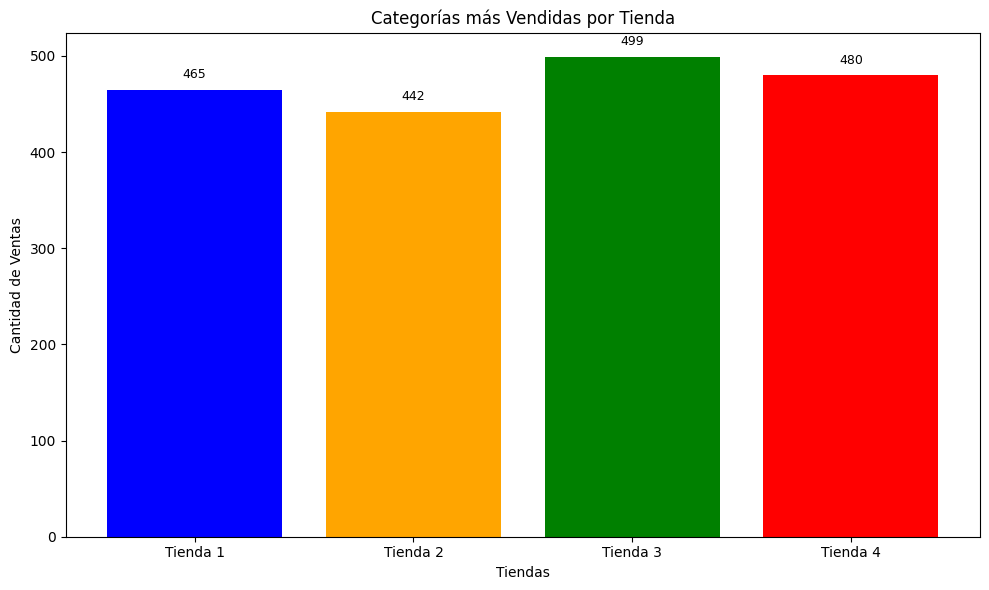

In [38]:
# realizame un grafico con las categorias mas vendidas en cada tienda

categorias = [serie.idxmax() for serie in ventas]
cantidades = [int(serie.max()) for serie in ventas]

plt.figure(figsize=(10,6))
bars = plt.bar(tiendas, cantidades, color=['blue', 'orange', 'green', 'red'])
plt.title('Categorías más Vendidas por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Cantidad de Ventas')

# Anotar cada barra con su valor
for bar, val in zip(bars, cantidades):
    plt.annotate(f'{int(val):,}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 6), textcoords='offset points', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [17]:
# En este paso, calcular las calificaciones promedio de los clientes para cada tienda.
# Algunas hojas usan 'Calificación' en lugar de 'Calificación del Cliente', así que probamos ambas opciones.
def obtener_promedio_calificacion(df):
	for nombre in ['Calificación del Cliente', 'Calificación']:
		if nombre in df.columns:
			return df[nombre].mean()
	return float('nan')

calificacion_promedio_tienda1 = obtener_promedio_calificacion(tienda)
calificacion_promedio_tienda2 = obtener_promedio_calificacion(tienda2)
calificacion_promedio_tienda3 = obtener_promedio_calificacion(tienda3)
calificacion_promedio_tienda4 = obtener_promedio_calificacion(tienda4)

print(f"Calificación promedio de la tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio de la tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio de la tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio de la tienda 4: {calificacion_promedio_tienda4:.2f}")


Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.00


la tienda con mejor calificacion promedio es la tienda 3 con una calificacion de 4.05, mientras que la tienda numero 1 es la peor evaluada con una calificacion promedio de 3.98

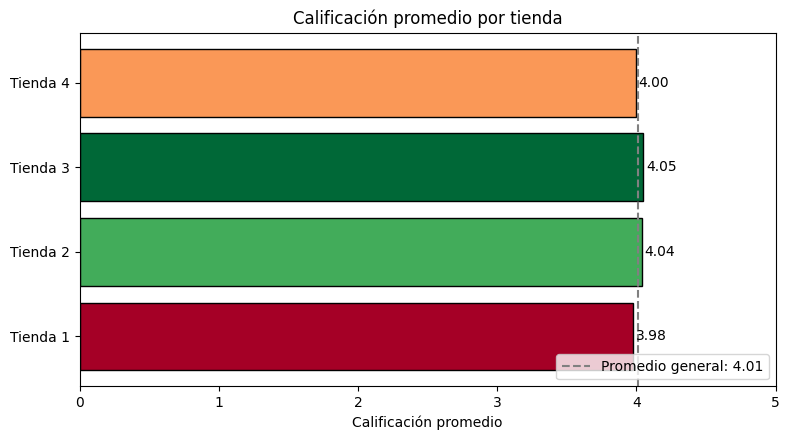

In [39]:
# Gráfico más apto para las calificaciones promedio: barras horizontales con anotaciones y línea de promedio
calificaciones = [
    calificacion_promedio_tienda1,
    calificacion_promedio_tienda2,
    calificacion_promedio_tienda3,
    calificacion_promedio_tienda4
]

plt.figure(figsize=(8,4.5))

# Colores según posición relativa entre el mínimo y máximo (mejor visualización)
min_v, max_v = min(calificaciones), max(calificaciones)
cmap = plt.get_cmap('RdYlGn')
if max_v - min_v == 0:
    colors = [cmap(0.5)] * len(calificaciones)
else:
    colors = [cmap((v - min_v) / (max_v - min_v)) for v in calificaciones]

bars = plt.barh(tiendas, calificaciones, color=colors, edgecolor='black')
plt.xlim(0, 5)
plt.xlabel('Calificación promedio')
plt.title('Calificación promedio por tienda')

# Anotar cada barra con su valor
for bar, val in zip(bars, calificaciones):
    plt.text(val + 0.02, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', va='center')

# Línea del promedio general
promedio_general = sum(calificaciones) / len(calificaciones)
plt.axvline(promedio_general, color='gray', linestyle='--', label=f'Promedio general: {promedio_general:.2f}')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

gracias a este grafico, se comprende que las tiendas 4,3,2 estan sobre el prodmedio general de las calificaciones, mientras que la tienda 1, se encuentra por debajo de la media.

# 4. Productos más y menos vendidos

In [41]:
def top_bottom_product(df):
    vc = df['Producto'].value_counts()
    top = vc.idxmax()
    bottom = vc.idxmin()
    return top, int(vc.max()), bottom, int(vc.min())

for nombre, df in zip(tiendas, stores):
    top, top_count, bottom, bottom_count = top_bottom_product(df)
    print(f"{nombre} - Más vendido: {top} ({top_count} ventas) | Menos vendido: {bottom} ({bottom_count} ventas)")


Tienda 1 - Más vendido: Microondas (60 ventas) | Menos vendido: Auriculares con micrófono (33 ventas)
Tienda 2 - Más vendido: Iniciando en programación (65 ventas) | Menos vendido: Juego de mesa (32 ventas)
Tienda 3 - Más vendido: Kit de bancas (57 ventas) | Menos vendido: Bloques de construcción (35 ventas)
Tienda 4 - Más vendido: Cama box (62 ventas) | Menos vendido: Guitarra eléctrica (33 ventas)


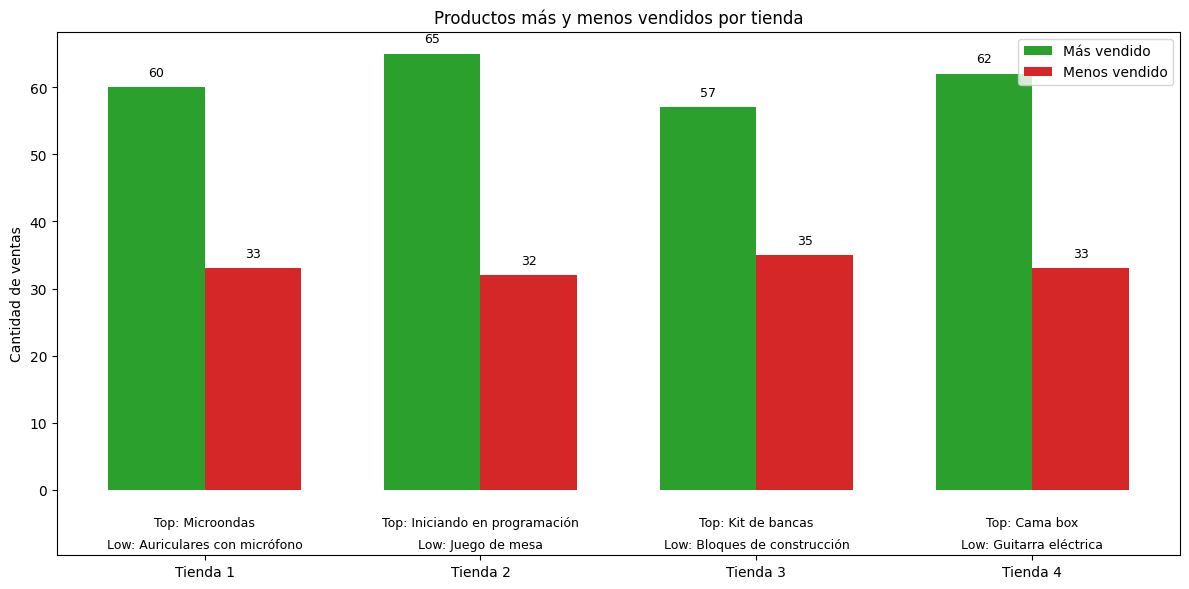

In [42]:
# Gráfico comparativo: producto más y menos vendido por tienda (usar variables ya existentes)
top_names = [
    mas_vendidos_tienda1.idxmax(),
    mas_vendidos_tienda2.idxmax(),
    mas_vendidos_tienda3.idxmax(),
    mas_vendidos_tienda4.idxmax()
]
top_counts = [
    int(mas_vendidos_tienda1.max()),
    int(mas_vendidos_tienda2.max()),
    int(mas_vendidos_tienda3.max()),
    int(mas_vendidos_tienda4.max())
]

bottom_names = [
    menos_vendidos_tienda1.idxmin(),
    menos_vendidos_tienda2.idxmin(),
    menos_vendidos_tienda3.idxmin(),
    menos_vendidos_tienda4.idxmin()
]
bottom_counts = [
    int(menos_vendidos_tienda1.min()),
    int(menos_vendidos_tienda2.min()),
    int(menos_vendidos_tienda3.min()),
    int(menos_vendidos_tienda4.min())
]

x = list(range(len(tiendas)))
width = 0.35
max_count = max(top_counts + bottom_counts)

plt.figure(figsize=(12,6))
bars_top = plt.bar([xi - width/2 for xi in x], top_counts, width=width, color='tab:green', label='Más vendido')
bars_bottom = plt.bar([xi + width/2 for xi in x], bottom_counts, width=width, color='tab:red', label='Menos vendido')

plt.xticks(x, tiendas)
plt.ylabel('Cantidad de ventas')
plt.title('Productos más y menos vendidos por tienda')

# Anotar conteos encima de las barras
for bar in bars_top:
    plt.annotate(f'{int(bar.get_height())}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0,6), textcoords='offset points', ha='center', va='bottom', fontsize=9)
for bar in bars_bottom:
    plt.annotate(f'{int(bar.get_height())}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0,6), textcoords='offset points', ha='center', va='bottom', fontsize=9)

# Mostrar nombres de los productos debajo del eje x (dos líneas: top / bottom)
for xi, tname, bname in zip(x, top_names, bottom_names):
    plt.text(xi, -max_count*0.06, f'Top: {tname}', ha='center', va='top', fontsize=9, rotation=0)
    plt.text(xi, -max_count*0.11, f'Low: {bname}', ha='center', va='top', fontsize=9, rotation=0)

plt.ylim(bottom=-max_count*0.15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

analizando este grafico, entendemos que la tienda dos es la que posee mas ventas de un producto que el resto en este caso es el libro llamado "inciando en programacion" el cual fue vendido 65 veces, a demas de contar con el producto con menos ventas de las 4 tiendas la cual es un juego de mesa con 32 ventas.

In [ ]:
#

# 5. Envío promedio por tienda

In [24]:
# En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.
def costo_envio_promedio(df):
    if 'Costo de envío' in df.columns:
        return df['Costo de envío'].mean()
    else:
        return float('nan')
costo_envio_tienda1 = costo_envio_promedio(tienda)
costo_envio_tienda2 = costo_envio_promedio(tienda2)
costo_envio_tienda3 = costo_envio_promedio(tienda3)
costo_envio_tienda4 = costo_envio_promedio(tienda4)
print(f"Costo de envío promedio de la tienda 1: ${costo_envio_tienda1:.0f}")
print(f"Costo de envío promedio de la tienda 2: ${costo_envio_tienda2:.0f}")
print(f"Costo de envío promedio de la tienda 3: ${costo_envio_tienda3:.0f}")
print(f"Costo de envío promedio de la tienda 4: ${costo_envio_tienda4:.0f}")


Costo de envío promedio de la tienda 1: $26019
Costo de envío promedio de la tienda 2: $25216
Costo de envío promedio de la tienda 3: $24806
Costo de envío promedio de la tienda 4: $23459


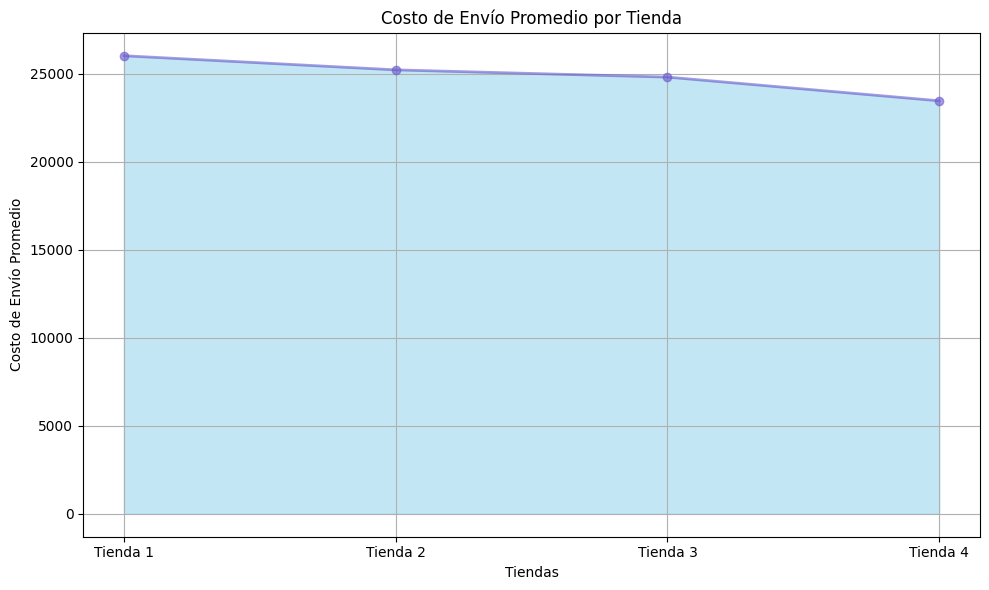

In [45]:

# creame un grafico de area con los costos de envio promedio de cada tienda 
costos_envio = [
    costo_envio_tienda1,
    costo_envio_tienda2,
    costo_envio_tienda3,
    costo_envio_tienda4
]
plt.figure(figsize=(10,6))

# usar posiciones numéricas para el eje x y luego etiquetarlas con los nombres de las tiendas
x = list(range(len(tiendas)))
plt.fill_between(x, costos_envio, color='skyblue', alpha=0.5)
plt.plot(x, costos_envio, color='Slateblue', alpha=0.6, linewidth=2, marker='o')
plt.xticks(x, tiendas)

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')
plt.grid(True)
plt.tight_layout()  
plt.show()


gracias al grafico, se logra inferir que la tienda uno el promedio de costo de envio es superior a 25.000, mientras que las tiendas 2 y 3 el promedio de costo de envio es alrededor de los 25.000 y en la tienda 4 el costo de enbio es inferior a los 25.000 

Introducción

A solicitud del cliente, se realizó un análisis comparativo del desempeño de sus cuatro tiendas. Para ello se evaluaron los ingresos totales, las categorías de productos más y menos vendidas, la calificación promedio de los clientes, los productos con mayor y menor rotación, y el costo de envío promedio. El objetivo fue determinar cuál tienda presenta menor rendimiento y, por lo tanto, sería la más óptima para su cierre.

Analisis

Los resultados muestran que la Tienda 1 genera el mayor nivel de ingresos, mientras que la Tienda 4 obtiene el menor. En todas las tiendas, la categoría más vendida corresponde a Muebles. Respecto a la satisfacción del cliente, la Tienda 3 presenta la mejor calificación promedio. Al revisar los productos, se observan variaciones: cada tienda posee artículos con mayor y menor rotación, lo que influye en su desempeño. Pese a ello, la Tienda 4 se destaca por tener los ingresos más bajos y calificaciones menos favorables en comparación con las demás, lo que afecta su competitividad.

Conclusión

Con base en los indicadores analizados, la Tienda 4 presenta el desempeño más bajo respecto a ingresos, satisfacción del cliente y rotación de productos. Por ello, se considera la opción más conveniente para su cierre, permitiendo optimizar recursos y potenciar las tiendas con mejores resultados.